In [7]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy import table

import pandas as pd

#https://github.com/jobovy/gaia_tools
import gaia_tools.load as gload
from gaia_tools import xmatch
import read_data as rd

import seaborn as sns

In [2]:
tgas = rd.load_tgas_df()

Load tgas and make ID 13.83


<IPython.core.display.Javascript object>


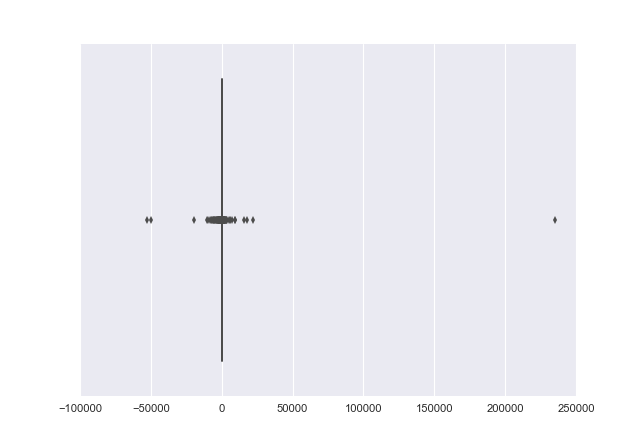

<IPython.core.display.Javascript object>


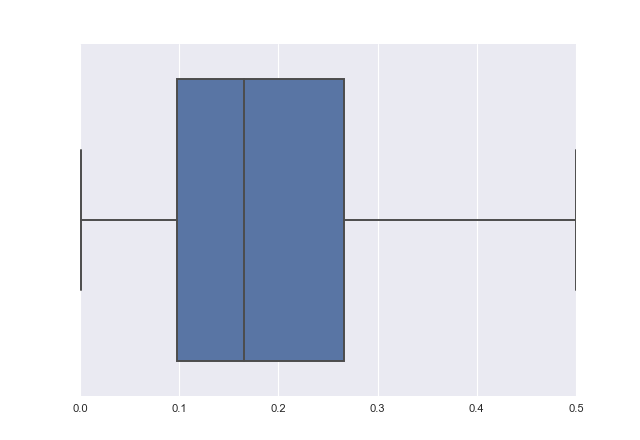

In [16]:
parallax_quality = tgas["parallax_error"]/tgas["parallax"]
parallax_quality_cut = np.logical_and(parallax_quality >=0, parallax_quality < 0.5)
plt.figure()
sns.boxplot(parallax_quality)
plt.figure()
sns.boxplot(parallax_quality[parallax_quality_cut])

330532

<IPython.core.display.Javascript object>


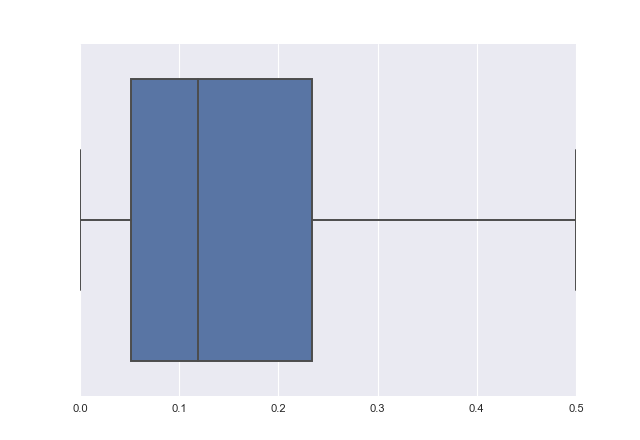

<IPython.core.display.Javascript object>


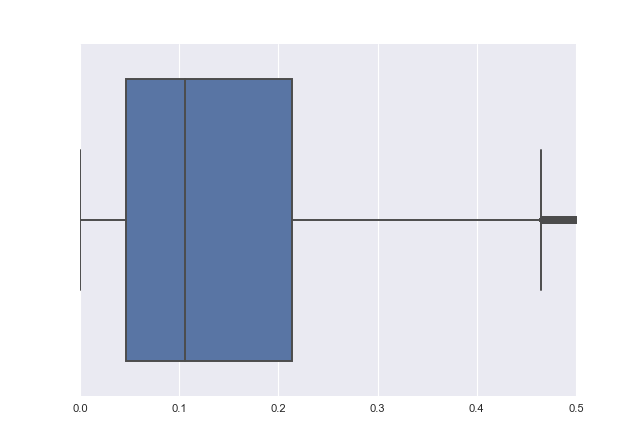

In [45]:
# Unit: mas/yr
pmra_quality = np.abs(tgas["pmra_error"]/tgas["pmra"])
pmdec_quality= np.abs(tgas["pmdec_error"]/tgas["pmdec"])

pmra_quality_cut = np.logical_and(pmra_quality >=0, pmra_quality < 0.5)
pmdec_quality_cut = np.logical_and(pmdec_quality >=0, pmdec_quality < 0.5)

plt.figure()
sns.boxplot(pmra_quality[pmra_quality_cut])
plt.figure()
sns.boxplot(pmdec_quality[pmdec_quality_cut])
#sns.boxplot(parallax_quality[parallax_quality_cut])

In [46]:
for quality_cut in [parallax_quality_cut,pmra_quality_cut,pmdec_quality_cut]:
    print "{} bad".format(len(tgas)-np.sum(quality_cut))
#tgas_par = tgas[parallax_quality_cut]
#print "{} bad parallaxes".format(len(tgas)-len(tgas_par))
goodii = np.logical_and(np.logical_and(pmra_quality_cut,pmdec_quality_cut),parallax_quality_cut)
print np.sum(goodii)
tgas_good = tgas[goodii]

330532 bad
537528 bad
416893 bad
1171023


In [47]:
def contourbin(x,y,binx=None,biny=None,ax=None,**kwargs):
    if binx is not None and biny is not None:
        h,xe,ye = np.histogram2d(np.array(x),np.array(y),bins=[binx,biny])
    else:
        h,xe,ye = np.histogram2d(np.array(x),np.array(y))        
    xmid = (xe[1:]+xe[:-1])/2.0
    ymid = (ye[1:]+ye[:-1])/2.0
    X, Y = np.meshgrid(xmid,ymid)
    ax.contour(X,Y,h.T,**kwargs)

In [44]:
tgas.columns

Index([u'hip', u'tycho2_id', u'solution_id', u'source_id', u'random_index',
       u'ref_epoch', u'ra', u'ra_error', u'dec', u'dec_error', u'parallax',
       u'parallax_error', u'pmra', u'pmra_error', u'pmdec', u'pmdec_error',
       u'ra_dec_corr', u'ra_parallax_corr', u'ra_pmra_corr', u'ra_pmdec_corr',
       u'dec_parallax_corr', u'dec_pmra_corr', u'dec_pmdec_corr',
       u'parallax_pmra_corr', u'parallax_pmdec_corr', u'pmra_pmdec_corr',
       u'astrometric_n_obs_al', u'astrometric_n_obs_ac',
       u'astrometric_n_good_obs_al', u'astrometric_n_good_obs_ac',
       u'astrometric_n_bad_obs_al', u'astrometric_n_bad_obs_ac',
       u'astrometric_delta_q', u'astrometric_excess_noise',
       u'astrometric_excess_noise_sig', u'astrometric_primary_flag',
       u'astrometric_relegation_factor', u'astrometric_weight_al',
       u'astrometric_weight_ac', u'astrometric_priors_used',
       u'matched_observations', u'duplicated_source',
       u'scan_direction_strength_k1', u'scan_directio

<IPython.core.display.Javascript object>


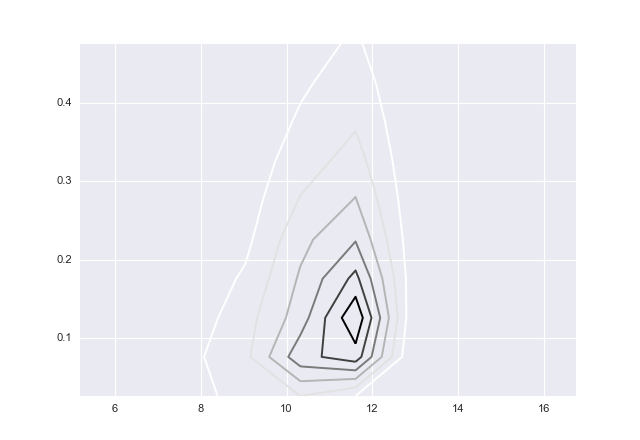

In [37]:
fig,ax = plt.subplots()
#plt.plot(tgas["phot_g_mean_mag"][parallax_quality_cut],parallax_quality[parallax_quality_cut],'k.')
contourbin(tgas["phot_g_mean_mag"][parallax_quality_cut],parallax_quality[parallax_quality_cut],ax=ax)

In [48]:
v_ra = tgas_good['pmra']/tgas_good['parallax'] * 4.762
v_dec= tgas_good['pmdec']/tgas_good['parallax']* 4.762

<IPython.core.display.Javascript object>


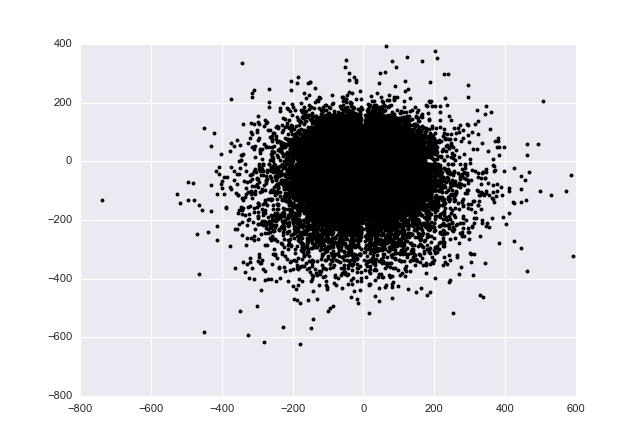

In [49]:
plt.figure()
plt.plot(v_ra,v_dec,'k.')

In [43]:
np.min(v_dec)

0.019837319996799749